In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
file_path = r"D:\Red_&_White\python\air_quality\AirQualityUCI.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError("CSV file not found. Please check the file path.")

df = pd.read_csv(file_path, sep=';', decimal=',')

In [12]:
# Remove completely empty columns
df.dropna(axis=1, how='all', inplace=True)

# Replace -200 (missing values) with NaN
df.replace(-200, pd.NA, inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Convert required columns to numeric
numeric_columns = [
    'CO(GT)', 'NO2(GT)', 'T', 'RH', 'AH'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
print("First 5 rows of dataset:")
print(df.head())

print("\nDataset statistics:")
print(df.describe())

First 5 rows of dataset:
        Date      Time  CO(GT) PT08.S1(CO) NMHC(GT) C6H6(GT) PT08.S2(NMHC)  \
0 2004-03-10  18.00.00     2.6      1360.0    150.0     11.9        1046.0   
1 2004-03-10  19.00.00     2.0      1292.0    112.0      9.4         955.0   
2 2004-03-10  20.00.00     2.2      1402.0     88.0      9.0         939.0   
3 2004-03-10  21.00.00     2.2      1376.0     80.0      9.2         948.0   
4 2004-03-10  22.00.00     1.6      1272.0     51.0      6.5         836.0   

  NOx(GT) PT08.S3(NOx)  NO2(GT) PT08.S4(NO2) PT08.S5(O3)     T    RH      AH  \
0   166.0       1056.0    113.0       1692.0      1268.0  13.6  48.9  0.7578   
1   103.0       1174.0     92.0       1559.0       972.0  13.3  47.7  0.7255   
2   131.0       1140.0    114.0       1555.0      1074.0  11.9  54.0  0.7502   
3   172.0       1092.0    122.0       1584.0      1203.0  11.0  60.0  0.7867   
4   131.0       1205.0    116.0       1490.0      1110.0  11.2  59.6  0.7888   

  ,,,,,  
0   NaN  
1    

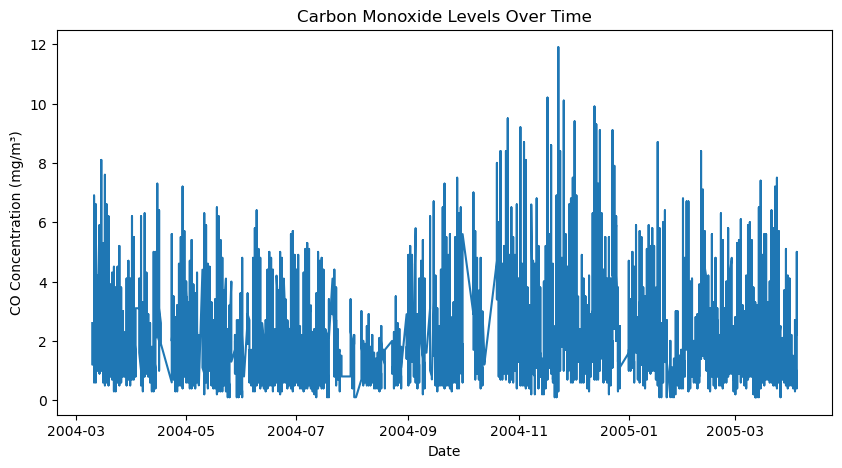

In [14]:
# Remove rows with missing CO values
df_co = df.dropna(subset=['CO(GT)'])

plt.figure(figsize=(10, 5))
plt.plot(df_co['Date'], df_co['CO(GT)'])
plt.xlabel("Date")
plt.ylabel("CO Concentration (mg/m³)")
plt.title("Carbon Monoxide Levels Over Time")
plt.show()

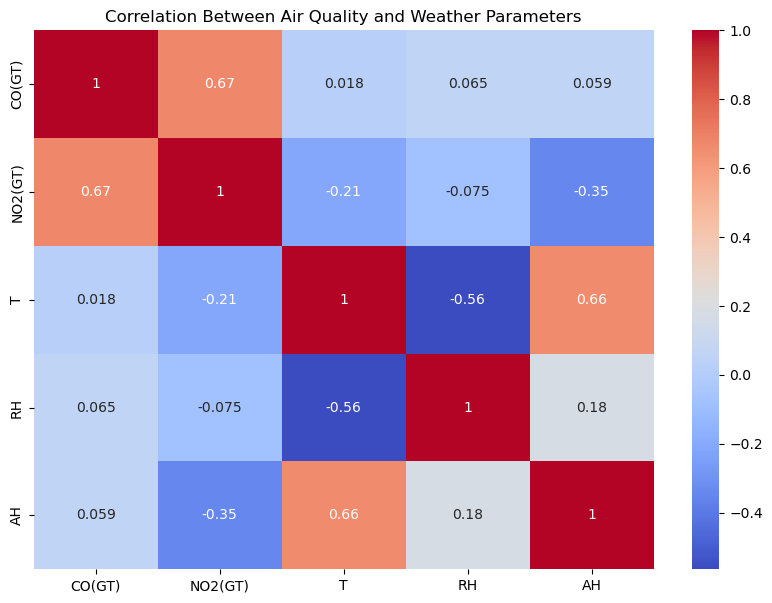

In [15]:
# Select numeric data and remove missing values
numeric_df = df.select_dtypes(include='number').dropna()

plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), cmap='coolwarm',  annot=True)
plt.title("Correlation Between Air Quality and Weather Parameters")
plt.show()

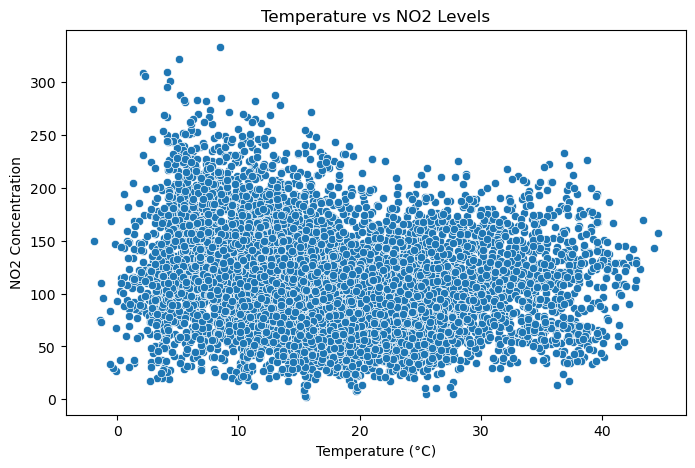

In [16]:
# Visualization 3: Temperature vs NO2
df_temp_no2 = df.dropna(subset=['T', 'NO2(GT)'])

plt.figure(figsize=(8, 5))
sns.scatterplot(x='T', y='NO2(GT)', data=df_temp_no2)
plt.xlabel("Temperature (°C)")
plt.ylabel("NO2 Concentration")
plt.title("Temperature vs NO2 Levels")
plt.show()